In [25]:
#ES1

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#Function to create the problem
def script(A,x_true):
 b=A@x_true
 cond_2=np.linalg.cond(A,2)
 cond_inf=np.linalg.cond(A,np.inf)
 x_sol=np.linalg.solve(A,b)
 abs_err= np.linalg.norm(x_sol-x_true,2)
 rel_err=abs_err/np.linalg.norm(x_true,2)
 return (x_sol, cond_2, cond_inf, abs_err, rel_err)

def plot(rel_errs, cond_2s, cond_infs, n):
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(n, rel_errs)
  plt.xlabel('N')
  plt.ylabel('Errore Relativo')
  plt.title('Errore Relativo vs N')
  plt.subplot(1, 2, 2)
  plt.plot(n, cond_2s, label='Norma 2')
  plt.plot(n, cond_infs, label='Norma Infinito')
  plt.xlabel('N')
  plt.ylabel('Numero di Condizionamento')
  plt.title('Numero di Condizionamento vs N')
  plt.legend()
  plt.tight_layout()
  plt.show()


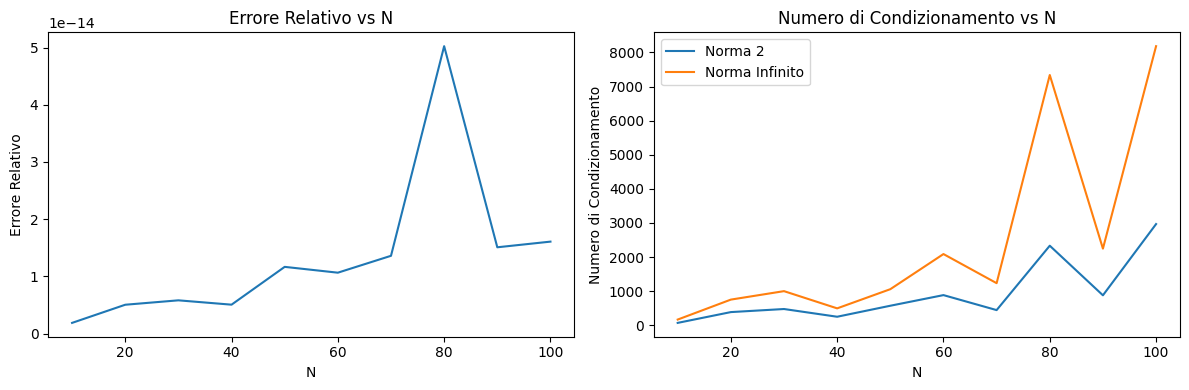

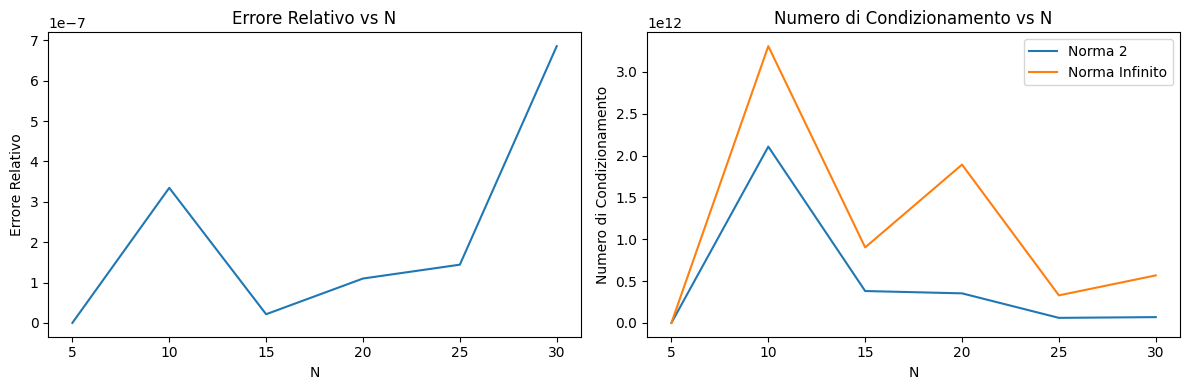

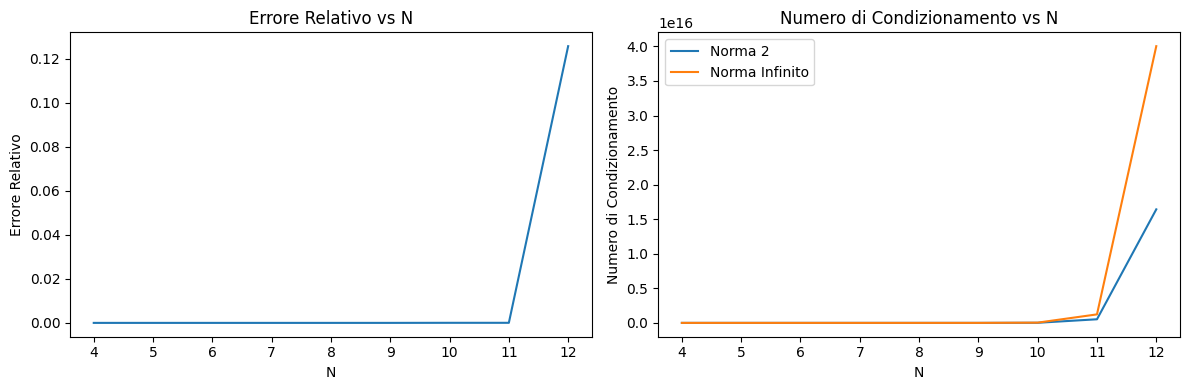

In [26]:
#TEST

def test(n):
 x_true=np.ones((n,))
 A=np.random.rand(n,n)
 return script(A, x_true)

def test_vander(n):
 x_true=np.ones((n,))
 x=np.arange(1,n+1,1)
 A=np.vander(x, N=n)
 return script(A,x_true)

def test_hilbert(n):
 x_true=np.ones((n,))
 A=sp.linalg.hilbert(n)
 return script(A,x_true)

#RANDOM MATRIX
rel_errs=[]
cond_2s=[]
cond_infs=[]
n=np.arange(10,110,10)
for i in n:
 x_sol, cond_2, cond_inf, abs_err, rel_err = test(i)
 rel_errs.append(rel_err)
 cond_2s.append(cond_2)
 cond_infs.append(cond_inf)

plot(rel_errs, cond_2s, cond_infs, n)


#VANDER
rel_errs=[]
cond_2s=[]
cond_infs=[]
n=np.arange(5,35,5)
for i in n:
 x_sol, cond_2, cond_inf, abs_err, rel_err = test_vander(i)
 rel_errs.append(rel_err)
 cond_2s.append(cond_2)
 cond_infs.append(cond_inf)

plot(rel_errs, cond_2s, cond_infs, n)


#HILBERT
rel_errs=[]
cond_2s=[]
cond_infs=[]
n=np.arange(4,13,1)

for i in n:
 x_sol, cond_2, cond_inf, abs_err, rel_err = test_hilbert(i)
 rel_errs.append(rel_err)
 cond_2s.append(cond_2)
 cond_infs.append(cond_inf)

plot(rel_errs, cond_2s, cond_infs, n)


In [27]:
#FLOATING POINTS

import math

#ES1
def f():
  e=1
  while( float(1+e) > 1):
    res=e
    e=e/2
  return res

print(f())


#ES2

def function(n):
 return (1+1/n)**n

for i in [1, 10, 1000, 1000000, 1000000000]:
  n=function(i)
  print(f"i: {i}")
  print(f"N: {n}")
  print(f"N-e: {n-math.e}\n")

#ES3
A=np.array(([4,2],[1,3]))
B=np.array(([4,2],[2,1]))

rank_A=np.linalg.matrix_rank(A)
rank_B=np.linalg.matrix_rank(B)

eig_A=np.linalg.eigvals(A)
eig_B=np.linalg.eigvals(B)

print(f"Rango A: {rank_A}")
print(f"Rango B: {rank_B}")

if(rank_A == 2 and rank_B == 2):
  print("Sono entrambe rango massimo")
elif(rank_A == 2):
  print("A è di rango massimo")
elif(rank_B == 2):
  print("B è di rango massimo")
else:
  print("Nessuna delle due è di grado massimo")

print(f"Autovalori di A: {eig_A}")
print(f"Autovalori di B: {eig_B}")

#A ha tutti autovalori positivi e maggiori di 0 -> ha rango massimo
#B ha un autovalore = 0 quindi non ha grado massimo

#altre matrici di esempio

n=2
A=np.random.rand(n,n)
eig_A=np.linalg.eigvals(A)
rank_A=np.linalg.matrix_rank(A)
print()
print(f"Autovalori: {eig_A}")
print(f"Rango: {rank_A}")

2.220446049250313e-16
i: 1
N: 2.0
N-e: -0.7182818284590451

i: 10
N: 2.5937424601000023
N-e: -0.12453936835904278

i: 1000
N: 2.7169239322355936
N-e: -0.0013578962234515046

i: 1000000
N: 2.7182804690957534
N-e: -1.359363291708604e-06

i: 1000000000
N: 2.7182820520115603
N-e: 2.2355251516614771e-07

Rango A: 2
Rango B: 1
A è di rango massimo
Autovalori di A: [5. 2.]
Autovalori di B: [5. 0.]

Autovalori: [ 1.12627988 -0.26018158]
Rango: 2
